In [4]:
pip install earthaccess

Note: you may need to restart the kernel to use updated packages.


In [1]:
import earthaccess
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from xarray.backends.api import open_datatree

In [2]:
import os
import earthaccess
from getpass import getpass

# Prompt for credentials securely
os.environ["EARTHDATA_USERNAME"] = input("Enter your Earthdata username: ")
os.environ["EARTHDATA_PASSWORD"] = getpass("Enter your Earthdata password: ")

# Log in
auth = earthaccess.login(persist=False)

Enter your Earthdata username:  joseand0803
Enter your Earthdata password:  ········


In [3]:
auth = earthaccess.login(persist=True)

In [4]:
results = earthaccess.search_datasets(instrument="oci")

In [5]:
for item in results:
    summary = item.summary()
    print(summary["short-name"])

PACE_OCI_L2_AOP
PACE_OCI_L1B_SCI
PACE_OCI_L2_BGC
PACE_OCI_L2_AOP_NRT
PACE_OCI_L2_BGC_NRT
PACE_OCI_L2_SFREFL
PACE_OCI_L3M_CHL_NRT
PACE_OCI_L2_SFREFL_NRT
PACE_OCI_L3M_CHL
PACE_OCI_L4M_MOANA
PACE_OCI_L2_CLOUD_MASK
PACE_OCI_L2_IOP
PACE_OCI_L3M_RRS
PACE_OCI_L1C_SCI
PACE_OCI_L2_AER_UAA
PACE_OCI_L2_CLOUD
PACE_OCI_L3M_CLOUD
PACE_OCI_L3M_LANDVI
PACE_OCI_L2_AER_UAA_NRT
PACE_OCI_L2_CLOUD_MASK_NRT
PACE_OCI_L2_IOP_NRT
PACE_OCI_L2_PAR
PACE_OCI_L2_UVAI_UAA_NRT
PACE_OCI_L3B_CHL
PACE_OCI_L3B_PAR
PACE_OCI_L3M_AER_UAA
PACE_OCI_L3M_CARBON
PACE_OCI_L3M_CLOUD_NRT
PACE_OCI_L3M_FLH
PACE_OCI_L3M_KD_NRT
PACE_OCI_L3M_POC
PACE_OCI_L3M_RRS_NRT
PACE_OCI_L3M_SFREFL
PACE_OCI_L0_SCI
PACE_OCI_L1A_SCI
PACE_OCI_L2_CLOUD_NRT
PACE_OCI_L2_LANDVI
PACE_OCI_L2_LANDVI_NRT
PACE_OCI_L2_PAR_NRT
PACE_OCI_L2_UVAI_UAA
PACE_OCI_L3B_AVW
PACE_OCI_L3B_AVW_NRT
PACE_OCI_L3B_CARBON
PACE_OCI_L3B_CARBON_NRT
PACE_OCI_L3B_CHL_NRT
PACE_OCI_L3B_FLH
PACE_OCI_L3B_FLH_NRT
PACE_OCI_L3B_IOP
PACE_OCI_L3B_IOP_NRT
PACE_OCI_L3B_KD
PACE_OCI_L3B_KD_NRT
PACE

In [6]:
results = earthaccess.search_data(
    short_name="PACE_OCI_L3B_POC",
    count=1,
)

In [9]:
# Time range
tspan = ("2025-09-01", "2025-09-02")  # (start_date, end_date)

# Bounding box for the northern Gulf of California
bbox = (-115.2, 28.5, -111.0, 32.0)  # (min_lon, min_lat, max_lon, max_lat)

# Cloud cover filter
clouds = (0, 30)  # min/max cloud percentage

In [10]:
results = earthaccess.search_data(
    short_name="PACE_OCI_L3B_POC",
    temporal=tspan,
    bounding_box=bbox,  # <- comma added here
    # cloud_cover removed – this filter is NOT supported for PACE L2
)

print("Number of granules:", len(results))
print("Granules:")
for g in results:
    print(" -", g)

Number of granules: 8
Granules:
 - Collection: {'Version': '3.1', 'ShortName': 'PACE_OCI_L3B_POC'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'NorthBoundingCoordinate': 90, 'WestBoundingCoordinate': -180, 'EastBoundingCoordinate': 180, 'SouthBoundingCoordinate': -90}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2025-08-05T00:00:00Z', 'EndingDateTime': '2025-09-05T23:59:59Z'}}
Size(MB): 189.14119815826416
Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250805_20250905.L3b.R32.POC.V3_1.nc']
 - Collection: {'Version': '3.1', 'ShortName': 'PACE_OCI_L3B_POC'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'NorthBoundingCoordinate': 90, 'SouthBoundingCoordinate': -90, 'EastBoundingCoordinate': 180, 'WestBoundingCoordinate': -180}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2025-08-13T00:00:00Z', 'EndingDateTime': '2025-09-13T23:59:59Z'}}
Si

In [11]:
results[0]

Collection: {'Version': '3.1', 'ShortName': 'PACE_OCI_L3B_POC'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'NorthBoundingCoordinate': 90, 'WestBoundingCoordinate': -180, 'EastBoundingCoordinate': 180, 'SouthBoundingCoordinate': -90}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2025-08-05T00:00:00Z', 'EndingDateTime': '2025-09-05T23:59:59Z'}}
Size(MB): 189.14119815826416
Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250805_20250905.L3b.R32.POC.V3_1.nc']

In [12]:
results[1]

Collection: {'Version': '3.1', 'ShortName': 'PACE_OCI_L3B_POC'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'NorthBoundingCoordinate': 90, 'SouthBoundingCoordinate': -90, 'EastBoundingCoordinate': 180, 'WestBoundingCoordinate': -180}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2025-08-13T00:00:00Z', 'EndingDateTime': '2025-09-13T23:59:59Z'}}
Size(MB): 189.49014949798584
Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250813_20250913.L3b.R32.POC.V3_1.nc']

In [13]:
results[2]

Collection: {'ShortName': 'PACE_OCI_L3B_POC', 'Version': '3.1'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -180, 'SouthBoundingCoordinate': -90, 'EastBoundingCoordinate': 180, 'NorthBoundingCoordinate': 90}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2025-08-21T00:00:00Z', 'EndingDateTime': '2025-09-21T23:59:59Z'}}
Size(MB): 190.32085514068604
Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250821_20250921.L3b.R32.POC.V3_1.nc']

In [14]:
results[3]

Collection: {'ShortName': 'PACE_OCI_L3B_POC', 'Version': '3.1'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'SouthBoundingCoordinate': -90, 'EastBoundingCoordinate': 180, 'NorthBoundingCoordinate': 90, 'WestBoundingCoordinate': -180}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2025-08-29T00:00:00Z', 'EndingDateTime': '2025-09-05T23:59:59Z'}}
Size(MB): 140.1300392150879
Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250829_20250905.L3b.8D.POC.V3_1.nc']

In [15]:
results[4]

Collection: {'Version': '3.1', 'ShortName': 'PACE_OCI_L3B_POC'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'NorthBoundingCoordinate': 90, 'SouthBoundingCoordinate': -90, 'EastBoundingCoordinate': 180, 'WestBoundingCoordinate': -180}]}}}
Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2025-09-29T23:59:59Z', 'BeginningDateTime': '2025-08-29T00:00:00Z'}}
Size(MB): 191.6919412612915
Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250829_20250929.L3b.R32.POC.V3_1.nc']

In [16]:
# Specify the folder where you want to save all files
local_folder = "L2_data"

# Download all granules
paths = earthaccess.download(results, local_path=local_folder)

# Check which files were successfully downloaded
print("Downloaded files:")
for p in paths:
    print(p)

print(f"Total files downloaded: {len(paths)}")

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

Downloaded files:
L2_data/PACE_OCI.20250805_20250905.L3b.R32.POC.V3_1.nc
L2_data/PACE_OCI.20250813_20250913.L3b.R32.POC.V3_1.nc
L2_data/PACE_OCI.20250821_20250921.L3b.R32.POC.V3_1.nc
L2_data/PACE_OCI.20250829_20250905.L3b.8D.POC.V3_1.nc
L2_data/PACE_OCI.20250829_20250929.L3b.R32.POC.V3_1.nc
L2_data/PACE_OCI.20250901.L3b.DAY.POC.V3_1.nc
L2_data/PACE_OCI.20250901_20250930.L3b.MO.POC.V3_1.nc
L2_data/PACE_OCI.20250902.L3b.DAY.POC.V3_1.nc
Total files downloaded: 8


In [17]:
print(len(paths))
print(paths)

8
['L2_data/PACE_OCI.20250805_20250905.L3b.R32.POC.V3_1.nc', 'L2_data/PACE_OCI.20250813_20250913.L3b.R32.POC.V3_1.nc', 'L2_data/PACE_OCI.20250821_20250921.L3b.R32.POC.V3_1.nc', 'L2_data/PACE_OCI.20250829_20250905.L3b.8D.POC.V3_1.nc', 'L2_data/PACE_OCI.20250829_20250929.L3b.R32.POC.V3_1.nc', 'L2_data/PACE_OCI.20250901.L3b.DAY.POC.V3_1.nc', 'L2_data/PACE_OCI.20250901_20250930.L3b.MO.POC.V3_1.nc', 'L2_data/PACE_OCI.20250902.L3b.DAY.POC.V3_1.nc']


In [18]:
dataset = xr.open_dataset(paths[1])
dataset

<xarray.Dataset> Size: 0B
Dimensions:  ()
Data variables:
    *empty*
Attributes: (12/47)
    product_name:                      PACE_OCI.20250813_20250913.L3b.R32.POC...
    title:                             OCI Level-3 Binned Data
    instrument:                        OCI
    platform:                          PACE
    temporal_range:                    32-day
    start_orbit_number:                0
    ...                                ...
    creator_url:                       https://oceandata.sci.gsfc.nasa.gov
    publisher_url:                     https://oceandata.sci.gsfc.nasa.gov
    processing_level:                  L3 Binned
    cdm_data_type:                     point
    identifier_product_doi_authority:  https://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L3B/POC/3.1

In [19]:
datatree = open_datatree(paths[0])
datatree

<xarray.DataTree>
Group: /
│   Attributes: (12/47)
│       product_name:                      PACE_OCI.20250805_20250905.L3b.R32.POC...
│       title:                             OCI Level-3 Binned Data
│       instrument:                        OCI
│       platform:                          PACE
│       temporal_range:                    32-day
│       start_orbit_number:                0
│       ...                                ...
│       creator_url:                       https://oceandata.sci.gsfc.nasa.gov
│       publisher_url:                     https://oceandata.sci.gsfc.nasa.gov
│       processing_level:                  L3 Binned
│       cdm_data_type:                     point
│       identifier_product_doi_authority:  https://dx.doi.org
│       identifier_product_doi:            10.5067/PACE/OCI/L3B/POC/3.1
├── Group: /level-3_binned_data
│       Dimensions:   (binListDim: 14635271, binDataDim: 14635271, binIndexDim: 4320)
│       Dimensions without coordinates: binListDim, binDataDim, binIndexDim
│       Data variables:
│           BinList   (binListDim) {'names': ['bin_num', 'nobs', 'nscenes', 'weights', 'time_rec'], 'formats': ['<u4', '<i2', '<i2', '<f4', '<f4'], 'offsets': [0, 4, 6, 8, 12], 'itemsize': 16, 'aligned': True} 234MB ...
│           poc       (binDataDim) {'names': ['sum', 'sum_squared'], 'formats': ['<f4', '<f4'], 'offsets': [0, 4], 'itemsize': 8, 'aligned': True} 117MB ...
│           BinIndex  (binIndexDim) {'names': ['start_num', 'begin', 'extent', 'max'], 'formats': ['<u4', '<u4', '<u4', '<u4'], 'offsets': [0, 4, 8, 12], 'itemsize': 16, 'aligned': True} 69kB ...
└── Group: /processing_control
    │   Attributes:
    │       software_name:     L3BIN
    │       software_version:  5.14
    │       input_sources:     PACE_OCI.20250805_20250812.L3b.8D.POC.V3_1.nc,PACE_OCI...
    │       l2_flag_names:     ATMFAIL,LAND,HILT,HISATZEN,STRAYLIGHT,CLDICE,COCCOLITH...
    └── Group: /processing_control/input_parameters
            Attributes: (12/26)
                infile:              /data13/sdpsoper/vdc/vpu12/workbuf/l3inlist.dat
                ofile:               PACE_OCI.20250805_20250905.L3b.R32.POC.V3_1.nc
                pfile:               PACE_OCI.20250805_20250905.L3b.R32.POC.V3_1.nc
                oformat:             netCDF4
                syear:               9999
                eyear:               9999
                ...                  ...
                unit_wgt:            0
                median:              0
                deflate:             4
                composite_prod:      
                composite_scheme:    
                doi:                 10.5067/PACE/OCI/L3B/POC/3.1

In [20]:
dataset = xr.merge(datatree.to_dict().values())
dataset

<xarray.Dataset> Size: 351MB
Dimensions:   (binListDim: 14635271, binDataDim: 14635271, binIndexDim: 4320)
Dimensions without coordinates: binListDim, binDataDim, binIndexDim
Data variables:
    BinList   (binListDim) {'names': ['bin_num', 'nobs', 'nscenes', 'weights', 'time_rec'], 'formats': ['<u4', '<i2', '<i2', '<f4', '<f4'], 'offsets': [0, 4, 6, 8, 12], 'itemsize': 16, 'aligned': True} 234MB ...
    poc       (binDataDim) {'names': ['sum', 'sum_squared'], 'formats': ['<f4', '<f4'], 'offsets': [0, 4], 'itemsize': 8, 'aligned': True} 117MB ...
    BinIndex  (binIndexDim) {'names': ['start_num', 'begin', 'extent', 'max'], 'formats': ['<u4', '<u4', '<u4', '<u4'], 'offsets': [0, 4, 8, 12], 'itemsize': 16, 'aligned': True} 69kB ...
Attributes: (12/47)
    product_name:                      PACE_OCI.20250805_20250905.L3b.R32.POC...
    title:                             OCI Level-3 Binned Data
    instrument:                        OCI
    platform:                          PACE
    temporal_range:                    32-day
    start_orbit_number:                0
    ...                                ...
    creator_url:                       https://oceandata.sci.gsfc.nasa.gov
    publisher_url:                     https://oceandata.sci.gsfc.nasa.gov
    processing_level:                  L3 Binned
    cdm_data_type:                     point
    identifier_product_doi_authority:  https://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L3B/POC/3.1

In [21]:
artist = dataset["poc"].plot.imshow(vmax=5)

ValueError: DataArray must be 2d

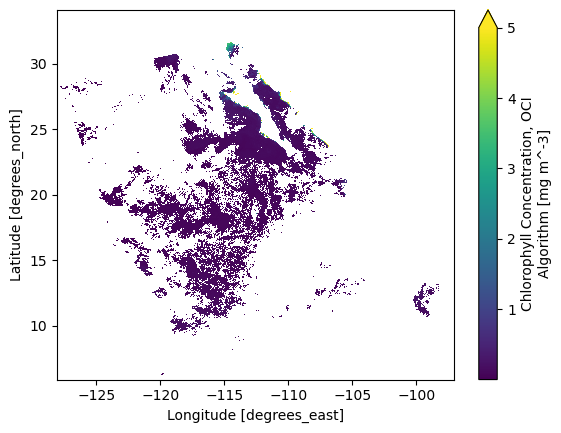

In [22]:
dataset = dataset.set_coords(("longitude", "latitude"))
artist = dataset["chlor_a"].plot(x="longitude", y="latitude", cmap="viridis", vmax=5)

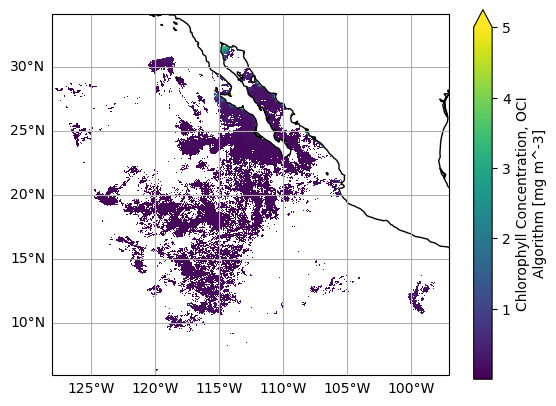

In [23]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels={"left": "y", "bottom": "x"})
artist = dataset["chlor_a"].plot(x="longitude", y="latitude", cmap="viridis", vmax=5, ax=ax)

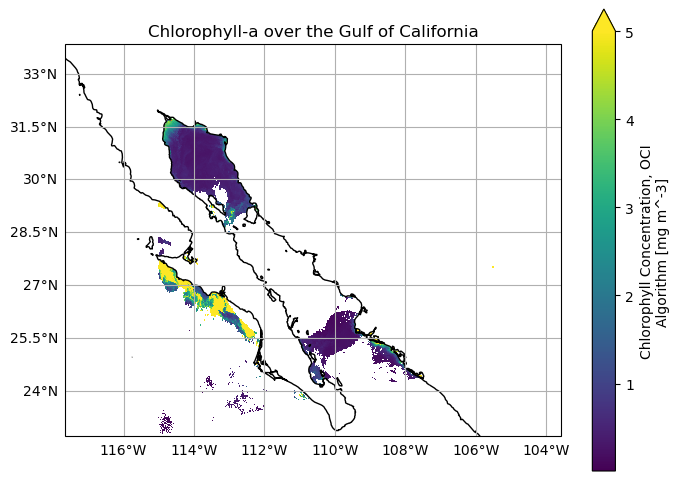

In [80]:
# Define bounding box
lat_min, lat_max = 22, 32
lon_min, lon_max = -115, -105

# Mask data to Gulf of California
gulf_data = dataset["chlor_a"].where(
    (dataset["latitude"] >= lat_min) &
    (dataset["latitude"] <= lat_max) &
    (dataset["longitude"] >= lon_min) &
    (dataset["longitude"] <= lon_max),
    drop=True  # removes points outside the box
)

# Plot
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels={"left": True, "bottom": True})

# Plot the masked data
artist = gulf_data.plot(
    x="longitude",
    y="latitude",
    cmap="viridis",
    vmax=5,
    ax=ax
)
plt.title("Chlorophyll-a over the Gulf of California")
plt.show()

In [118]:
results = earthaccess.search_data(
    short_name="PACE_OCI_L2_SFREFL",
    count=1,
)

In [220]:
# Time range
tspan = ("2024-11-01", "2024-11-05")  # (start_date, end_date)

# Bounding box for the Gulf of California
bbox = (-115.0, 23.0, -108.0, 31.0)  # (min_lon, min_lat, max_lon, max_lat)

# Cloud cover filter
clouds = (0, 50)  # min/max cloud percentage

In [221]:
results = earthaccess.search_data(
    short_name="PACE_OCI_L2_SFREFL",
    temporal=tspan,
    bounding_box=bbox,  # <- comma added here
    # cloud_cover removed – this filter is NOT supported for PACE L2
)

print("Number of granules:", len(results))
print("Granules:")
for g in results:
    print(" -", g)

Number of granules: 11
Granules:
 - Collection: {'ShortName': 'PACE_OCI_L2_SFREFL', 'Version': '3.1'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': 30.01961, 'Longitude': -91.89951}, {'Latitude': 24.72832, 'Longitude': -118.37057}, {'Latitude': 7.06946, 'Longitude': -113.11852}, {'Latitude': 12.12307, 'Longitude': -89.27764}, {'Latitude': 30.01961, 'Longitude': -91.89951}]}}]}}}
Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2024-11-01T19:43:17Z', 'BeginningDateTime': '2024-11-01T19:38:17Z'}}
Size(MB): 741.9324636459351
Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20241101T193817.L2.SFREFL.V3_1.nc']
 - Collection: {'ShortName': 'PACE_OCI_L2_SFREFL', 'Version': '3.1'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': 47.85233, 'Longitude': -93.31686}, {'Latitude': 41.88666, 'Longitude': -126.62012}, {'Latitude': 2

In [222]:
results[0]

Collection: {'ShortName': 'PACE_OCI_L2_SFREFL', 'Version': '3.1'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': 30.01961, 'Longitude': -91.89951}, {'Latitude': 24.72832, 'Longitude': -118.37057}, {'Latitude': 7.06946, 'Longitude': -113.11852}, {'Latitude': 12.12307, 'Longitude': -89.27764}, {'Latitude': 30.01961, 'Longitude': -91.89951}]}}]}}}
Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2024-11-01T19:43:17Z', 'BeginningDateTime': '2024-11-01T19:38:17Z'}}
Size(MB): 741.9324636459351
Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20241101T193817.L2.SFREFL.V3_1.nc']

In [223]:
results[1]

Collection: {'ShortName': 'PACE_OCI_L2_SFREFL', 'Version': '3.1'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': 47.85233, 'Longitude': -93.31686}, {'Latitude': 41.88666, 'Longitude': -126.62012}, {'Latitude': 24.73844, 'Longitude': -118.37486}, {'Latitude': 30.02999, 'Longitude': -91.9013}, {'Latitude': 47.85233, 'Longitude': -93.31686}]}}]}}}
Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2024-11-01T19:48:16Z', 'BeginningDateTime': '2024-11-01T19:43:17Z'}}
Size(MB): 715.8530473709106
Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20241101T194317.L2.SFREFL.V3_1.nc']

In [224]:
results[2]

Collection: {'Version': '3.1', 'ShortName': 'PACE_OCI_L2_SFREFL'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': 29.76586, 'Longitude': -100.48368}, {'Latitude': 24.48628, 'Longitude': -126.87202}, {'Latitude': 6.82333, 'Longitude': -121.64701}, {'Latitude': 11.87469, 'Longitude': -97.82626}, {'Latitude': 29.76586, 'Longitude': -100.48368}]}}]}}}
Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2024-11-02T20:17:35Z', 'BeginningDateTime': '2024-11-02T20:12:35Z'}}
Size(MB): 744.3326416015625
Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20241102T201235.L2.SFREFL.V3_1.nc']

In [225]:
# Specify the folder where you want to save the files
local_folder = "L2_data_SFREFL"

# Take only the first 3 granules
first_three = results[:3]

# Download only these
paths = earthaccess.download(first_three, local_path=local_folder)

# Check which files were successfully downloaded
print("Downloaded files:")
for p in paths:
    print(p)

print(f"Total files downloaded: {len(paths)}")


QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

Downloaded files:
L2_data_SFREFL/PACE_OCI.20241101T193817.L2.SFREFL.V3_1.nc
L2_data_SFREFL/PACE_OCI.20241101T194317.L2.SFREFL.V3_1.nc
L2_data_SFREFL/PACE_OCI.20241102T201235.L2.SFREFL.V3_1.nc
Total files downloaded: 3


In [125]:
print(len(paths))
print(paths)

4
['L2_data_SFREFL/PACE_OCI.20240701T192430.L2.SFREFL.V3_1.nc', 'L2_data_SFREFL/PACE_OCI.20240701T192930.L2.SFREFL.V3_1.nc', 'L2_data_SFREFL/PACE_OCI.20240701T210249.L2.SFREFL.V3_1.nc', 'L2_data_SFREFL/PACE_OCI.20240702T195911.L2.SFREFL.V3_1.nc']


In [249]:
dataset = xr.open_dataset(paths[1])
dataset

<xarray.Dataset> Size: 0B
Dimensions:  ()
Data variables:
    *empty*
Attributes: (12/47)
    title:                             OCI Level-2 Data SFREFL
    product_name:                      PACE_OCI.20241101T194317.L2.SFREFL.V3_...
    processing_version:                3.1
    history:                           l2gen par=/data1/sdpsoper/vdc/vpu0/wor...
    instrument:                        OCI
    platform:                          PACE
    ...                                ...
    geospatial_lon_min:                -126.620125
    startDirection:                    Ascending
    endDirection:                      Ascending
    day_night_flag:                    Day
    earth_sun_distance_correction:     1.0155506134033203
    geospatial_bounds:                 POLYGON ((-93.31686 47.85233, -126.620...

In [250]:
datatree = open_datatree(paths[1])
datatree

/var/folders/8n/fphqc7b17h36lwl02w5h90q80000gp/T/ipykernel_5696/4104127111.py:1: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  datatree = open_datatree(paths[1])


<xarray.DataTree>
Group: /
│   Attributes: (12/47)
│       title:                             OCI Level-2 Data SFREFL
│       product_name:                      PACE_OCI.20241101T194317.L2.SFREFL.V3_...
│       processing_version:                3.1
│       history:                           l2gen par=/data1/sdpsoper/vdc/vpu0/wor...
│       instrument:                        OCI
│       platform:                          PACE
│       ...                                ...
│       geospatial_lon_min:                -126.620125
│       startDirection:                    Ascending
│       endDirection:                      Ascending
│       day_night_flag:                    Day
│       earth_sun_distance_correction:     1.0155506134033203
│       geospatial_bounds:                 POLYGON ((-93.31686 47.85233, -126.620...
├── Group: /sensor_band_parameters
│       Dimensions:        (number_of_bands: 286, wavelength_3d: 122,
│                           number_of_reflective_bands: 286)
│       Coordinates:
│         * wavelength_3d  (wavelength_3d) float64 976B 346.0 351.0 ... 2.258e+03
│       Dimensions without coordinates: number_of_bands, number_of_reflective_bands
│       Data variables:
│           wavelength     (number_of_bands) float64 2kB ...
│           vcal_gain      (number_of_reflective_bands) float32 1kB ...
│           vcal_offset    (number_of_reflective_bands) float32 1kB ...
│           F0             (number_of_reflective_bands) float32 1kB ...
│           aw             (number_of_reflective_bands) float32 1kB ...
│           bbw            (number_of_reflective_bands) float32 1kB ...
│           k_oz           (number_of_reflective_bands) float32 1kB ...
│           k_no2          (number_of_reflective_bands) float32 1kB ...
│           Tau_r          (number_of_reflective_bands) float32 1kB ...
├── Group: /scan_line_attributes
│       Dimensions:  (number_of_lines: 1709)
│       Dimensions without coordinates: number_of_lines
│       Data variables: (12/13)
│           year     (number_of_lines) float64 14kB ...
│           day      (number_of_lines) timedelta64[ns] 14kB ...
│           msec     (number_of_lines) timedelta64[ns] 14kB ...
│           time     (number_of_lines) datetime64[ns] 14kB ...
│           detnum   (number_of_lines) float32 7kB ...
│           mside    (number_of_lines) float32 7kB ...
│           ...       ...
│           clon     (number_of_lines) float32 7kB ...
│           elon     (number_of_lines) float32 7kB ...
│           slat     (number_of_lines) float32 7kB ...
│           clat     (number_of_lines) float32 7kB ...
│           elat     (number_of_lines) float32 7kB ...
│           csol_z   (number_of_lines) float32 7kB ...
├── Group: /geophysical_data
│       Dimensions:   (number_of_lines: 1709, pixels_per_line: 1272, wavelength_3d: 122)
│       Dimensions without coordinates: number_of_lines, pixels_per_line, wavelength_3d
│       Data variables:
│           rhos      (number_of_lines, pixels_per_line, wavelength_3d) float32 1GB ...
│           l2_flags  (number_of_lines, pixels_per_line) int32 9MB ...
├── Group: /navigation_data
│       Dimensions:    (number_of_lines: 1709, pixels_per_line: 1272)
│       Dimensions without coordinates: number_of_lines, pixels_per_line
│       Data variables:
│           longitude  (number_of_lines, pixels_per_line) float32 9MB ...
│           latitude   (number_of_lines, pixels_per_line) float32 9MB ...
│           tilt       (number_of_lines) float32 7kB ...
│       Attributes:
│           gringpointlongitude:  [-118.374855  -91.9013    -93.31686  -126.620125]
│           gringpointlatitude:   [24.738436 30.029995 47.85233  41.886658]
│           gringpointsequence:   [1 2 3 4]
└── Group: /processing_control
    │   Attributes:
    │       software_name:     l2gen
    │       software_version:  9.11.0-09b1279b9
    │       input_sources:     PACE_OCI.20241101T194317.L1B.V3.nc,oci_gas_transmittan...
    │       calibration_data:  oci_ga

In [251]:
dataset = xr.merge(datatree.to_dict().values())
dataset

<xarray.Dataset> Size: 1GB
Dimensions:        (number_of_bands: 286, number_of_reflective_bands: 286,
                    wavelength_3d: 122, number_of_lines: 1709,
                    pixels_per_line: 1272)
Coordinates:
  * wavelength_3d  (wavelength_3d) float64 976B 346.0 351.0 ... 2.258e+03
Dimensions without coordinates: number_of_bands, number_of_reflective_bands,
                                number_of_lines, pixels_per_line
Data variables: (12/27)
    wavelength     (number_of_bands) float64 2kB ...
    vcal_gain      (number_of_reflective_bands) float32 1kB ...
    vcal_offset    (number_of_reflective_bands) float32 1kB ...
    F0             (number_of_reflective_bands) float32 1kB ...
    aw             (number_of_reflective_bands) float32 1kB ...
    bbw            (number_of_reflective_bands) float32 1kB ...
    ...             ...
    csol_z         (number_of_lines) float32 7kB ...
    rhos           (number_of_lines, pixels_per_line, wavelength_3d) float32 1GB ...
    l2_flags       (number_of_lines, pixels_per_line) int32 9MB ...
    longitude      (number_of_lines, pixels_per_line) float32 9MB ...
    latitude       (number_of_lines, pixels_per_line) float32 9MB ...
    tilt           (number_of_lines) float32 7kB ...
Attributes: (12/47)
    title:                             OCI Level-2 Data SFREFL
    product_name:                      PACE_OCI.20241101T194317.L2.SFREFL.V3_...
    processing_version:                3.1
    history:                           l2gen par=/data1/sdpsoper/vdc/vpu0/wor...
    instrument:                        OCI
    platform:                          PACE
    ...                                ...
    geospatial_lon_min:                -126.620125
    startDirection:                    Ascending
    endDirection:                      Ascending
    day_night_flag:                    Day
    earth_sun_distance_correction:     1.0155506134033203
    geospatial_bounds:                 POLYGON ((-93.31686 47.85233, -126.620...

In [252]:
# Check the wavelengths available for PACE 
dataset["wavelength_3d"]

<xarray.DataArray 'wavelength_3d' (wavelength_3d: 122)> Size: 976B
array([ 346.,  351.,  356.,  361.,  366.,  371.,  375.,  380.,  385.,  390.,
        395.,  400.,  405.,  410.,  415.,  420.,  425.,  430.,  435.,  440.,
        445.,  450.,  455.,  460.,  465.,  470.,  475.,  480.,  485.,  490.,
        495.,  500.,  505.,  510.,  515.,  520.,  525.,  530.,  535.,  540.,
        545.,  550.,  555.,  560.,  565.,  570.,  575.,  580.,  586.,  615.,
        620.,  625.,  630.,  635.,  640.,  642.,  645.,  647.,  650.,  652.,
        655.,  657.,  660.,  662.,  665.,  667.,  670.,  672.,  675.,  677.,
        679.,  682.,  697.,  699.,  702.,  704.,  707.,  709.,  712.,  714.,
        719.,  724.,  729.,  734.,  739.,  742.,  744.,  747.,  749.,  752.,
        754.,  772.,  774.,  779.,  784.,  789.,  794.,  799.,  804.,  809.,
        814.,  819.,  824.,  829.,  835.,  840.,  845.,  850.,  855.,  860.,
        865.,  870.,  875.,  880.,  885.,  890.,  895., 1038., 1249., 1618.,
       2131., 2258.])
Coordinates:
  * wavelength_3d  (wavelength_3d) float64 976B 346.0 351.0 ... 2.258e+03
Attributes:
    long_name:  wavelengths
    units:      nm
    valid_min:  0
    valid_max:  20000

('number_of_lines', 'pixels_per_line')
(1709, 1272)


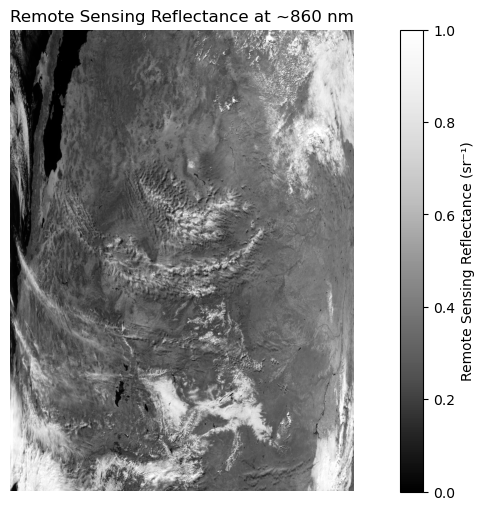

In [253]:
import matplotlib.pyplot as plt

# Select the band closest to 860 nm
rhos_860 = dataset["rhos"].sel({"wavelength_3d": 860}, method="nearest")

# Check dimensions
print(rhos_860.dims)  # likely ('number_of_lines', 'pixels_per_line')
print(rhos_860.shape)

# Simple 2D plot
plt.figure(figsize=(12, 6))
plt.imshow(rhos_860, cmap="Greys_r", vmin=0, vmax=1)
plt.colorbar(label="Remote Sensing Reflectance (sr⁻¹)")
plt.title("Remote Sensing Reflectance at ~860 nm")
plt.axis("off")
plt.show()


In [254]:
#Now flags 
dataset["l2_flags"]

<xarray.DataArray 'l2_flags' (number_of_lines: 1709, pixels_per_line: 1272)> Size: 9MB
[2173848 values with dtype=int32]
Dimensions without coordinates: number_of_lines, pixels_per_line
Attributes:
    long_name:      Level-2 Processing Flags
    valid_min:      -2147483648
    valid_max:      2147483647
    flag_masks:     [          1           2           4           8         ...
    flag_meanings:  ATMFAIL LAND PRODWARN HIGLINT HILT HISATZEN COASTZ SPARE ...

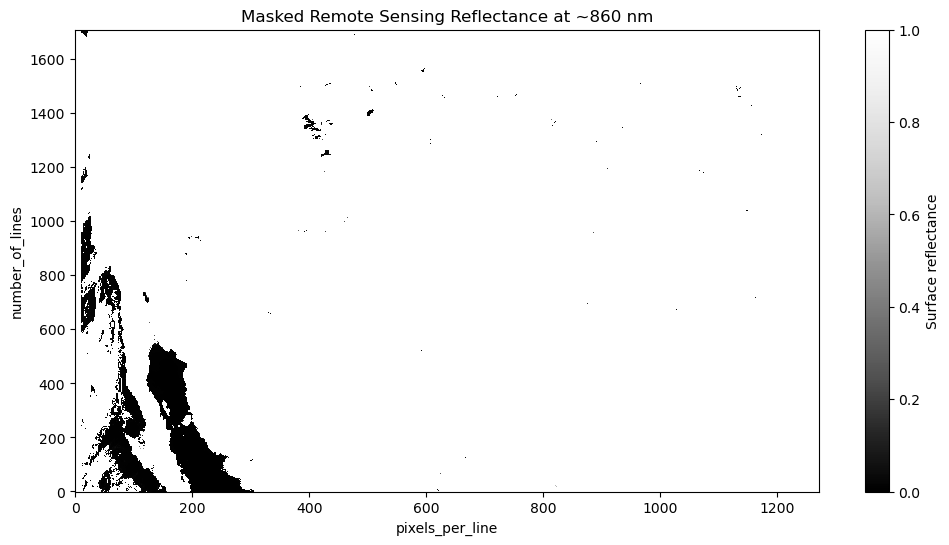

In [255]:
# Create mask for LAND and CLOUD/ICE flags
cldwater_mask = (
    (dataset["l2_flags"].cf == "LAND") | 
    (dataset["l2_flags"].cf == "CLDICE")
)

# Apply mask to your remote sensing reflectance
rhos_860_masked = rhos_860.where(~cldwater_mask)

# Plot the masked data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
rhos_860_masked.plot(cmap="Greys_r", vmin=0, vmax=1)
plt.title("Masked Remote Sensing Reflectance at ~860 nm")
plt.show()


In [256]:
import cf_xarray  # registers the .cf accessor

dataset["l2_flags"].cf.is_flag_variable  # should now work


True

In [257]:
# Create and apply Mask
dataset["l2_flags"].cf.is_flag_variable
cldwater_mask = (
    (dataset["l2_flags"].cf == "LAND")
& ~(dataset["l2_flags"].cf == "CLDICE")
)
# Apply mask, creating new dataset
rhos = dataset["rhos"].where(cldwater_mask)

In [258]:
# Select RGB bands (Red ~650 nm, Green ~560 nm, Blue ~470 nm)
rgb_da = dataset.sel(wavelength_3d=[650, 560, 470], method='nearest')
rgb_da


<xarray.Dataset> Size: 52MB
Dimensions:        (number_of_bands: 286, number_of_reflective_bands: 286,
                    wavelength_3d: 3, number_of_lines: 1709,
                    pixels_per_line: 1272)
Coordinates:
  * wavelength_3d  (wavelength_3d) float64 24B 650.0 560.0 470.0
Dimensions without coordinates: number_of_bands, number_of_reflective_bands,
                                number_of_lines, pixels_per_line
Data variables: (12/27)
    wavelength     (number_of_bands) float64 2kB ...
    vcal_gain      (number_of_reflective_bands) float32 1kB ...
    vcal_offset    (number_of_reflective_bands) float32 1kB ...
    F0             (number_of_reflective_bands) float32 1kB ...
    aw             (number_of_reflective_bands) float32 1kB ...
    bbw            (number_of_reflective_bands) float32 1kB ...
    ...             ...
    csol_z         (number_of_lines) float32 7kB ...
    rhos           (number_of_lines, pixels_per_line, wavelength_3d) float32 26MB ...
    l2_flags       (number_of_lines, pixels_per_line) int32 9MB ...
    longitude      (number_of_lines, pixels_per_line) float32 9MB ...
    latitude       (number_of_lines, pixels_per_line) float32 9MB ...
    tilt           (number_of_lines) float32 7kB ...
Attributes: (12/47)
    title:                             OCI Level-2 Data SFREFL
    product_name:                      PACE_OCI.20241101T194317.L2.SFREFL.V3_...
    processing_version:                3.1
    history:                           l2gen par=/data1/sdpsoper/vdc/vpu0/wor...
    instrument:                        OCI
    platform:                          PACE
    ...                                ...
    geospatial_lon_min:                -126.620125
    startDirection:                    Ascending
    endDirection:                      Ascending
    day_night_flag:                    Day
    earth_sun_distance_correction:     1.0155506134033203
    geospatial_bounds:                 POLYGON ((-93.31686 47.85233, -126.620...

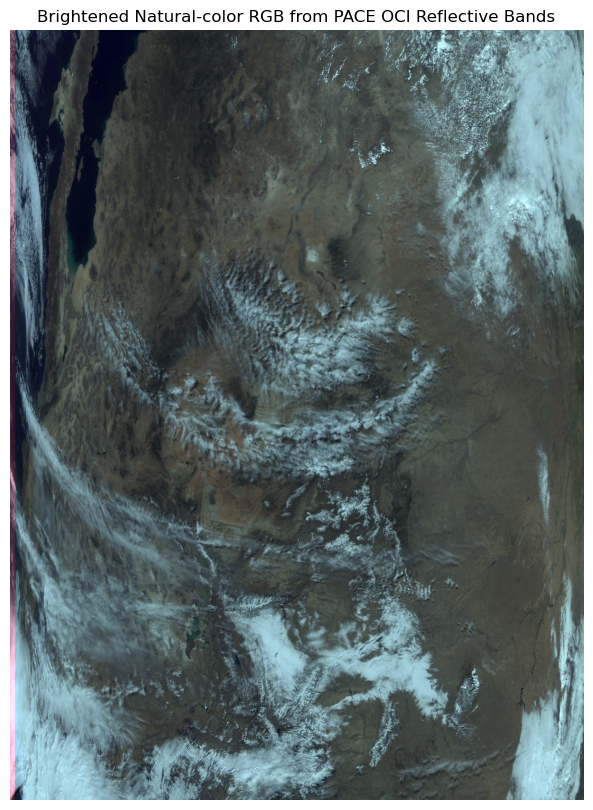

In [259]:
# Choose the variable containing the reflectance data
varname = "rhos"

# Select the DataArray for the R/G/B wavelengths
rgb_da = dataset[varname].sel(wavelength_3d=rgb_wls, method='nearest')

# Stack into (H, W, 3)
rgb = np.stack([rgb_da.sel(wavelength_3d=wl, method='nearest') for wl in rgb_wls], axis=-1)

# Normalize each channel 0-1
def normalize(channel):
    return (channel - np.nanmin(channel)) / (np.nanmax(channel) - np.nanmin(channel))

rgb_norm = np.stack([normalize(rgb[..., i]) for i in range(3)], axis=-1)

# Apply gamma correction for brightness
gamma = 0.6  # <1 brightens the image, >1 darkens
rgb_bright = np.power(rgb_norm, gamma)

# Optional: scale up to enhance brightness further
rgb_bright = np.clip(rgb_bright * 1.2, 0, 1)  # scale and clip to 0-1

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
plt.imshow(rgb_bright)
plt.axis('off')
plt.title("Brightened Natural-color RGB from PACE OCI Reflective Bands")
plt.show()


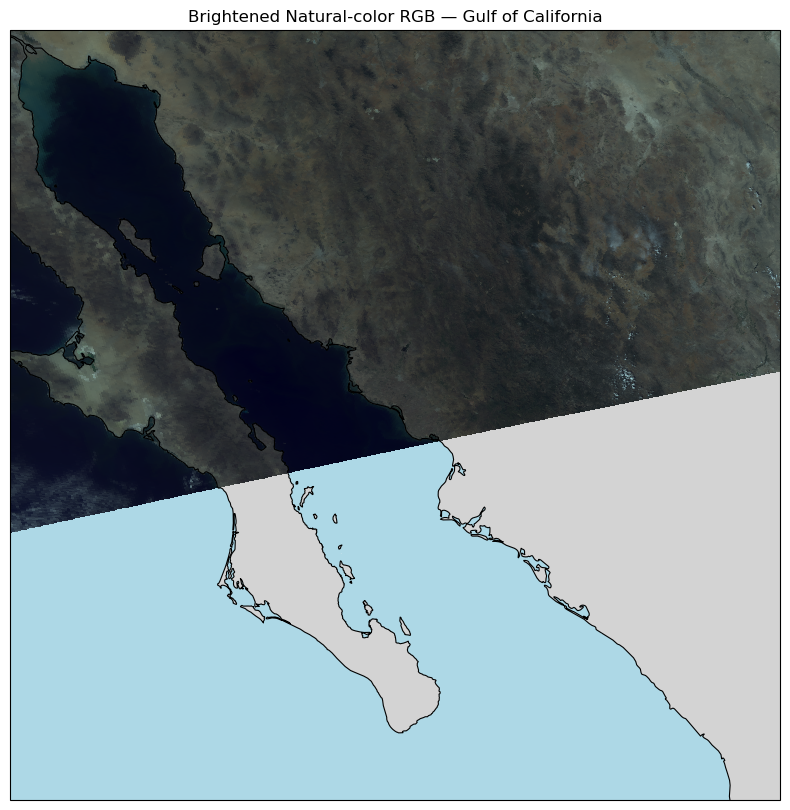

In [260]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# --- Choose wavelengths ---
rgb_wls = [650, 560, 470]  # R, G, B in nm
varname = "rhos"            # reflectance variable

# --- Select and stack RGB ---
rgb_da = dataset[varname].sel(wavelength_3d=rgb_wls, method='nearest')
rgb = np.stack([rgb_da.sel(wavelength_3d=wl, method='nearest') for wl in rgb_wls], axis=-1)

# --- Normalize each channel 0-1 ---
def normalize(channel):
    return (channel - np.nanmin(channel)) / (np.nanmax(channel) - np.nanmin(channel))

rgb_norm = np.stack([normalize(rgb[..., i]) for i in range(3)], axis=-1)

# --- Brighten ---
gamma = 0.6
rgb_bright = np.clip(np.power(rgb_norm, gamma) * 1.2, 0, 1)

# --- Coordinates ---
lon = dataset['longitude']
lat = dataset['latitude']

# If 1D coordinates, make 2D grid
if lon.ndim == 1 and lat.ndim == 1:
    Lon, Lat = np.meshgrid(lon, lat)
else:
    Lon, Lat = lon, lat

# --- Plot Gulf of California ---
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-115, -105, 22, 32], crs=ccrs.PlateCarree())  # Lon/Lat bounds for Gulf of California

ax.coastlines(resolution='10m', linewidth=0.8)
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=0)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=0)

# Plot RGB image
ax.pcolormesh(Lon, Lat, rgb_bright, transform=ccrs.PlateCarree(), shading='auto')

plt.title("Brightened Natural-color RGB — Gulf of California")
plt.show()


In [261]:
import numpy as np

# Select the red and green bands
red_band = dataset["rhos"].sel(wavelength_3d=650, method='nearest')    # Red
green_band = dataset["rhos"].sel(wavelength_3d=560, method='nearest')  # Green

# Compute NDTI
ndti = (red_band - green_band) / (red_band + green_band)

# Mask invalid or negative values if needed
ndti = ndti.where(np.isfinite(ndti))


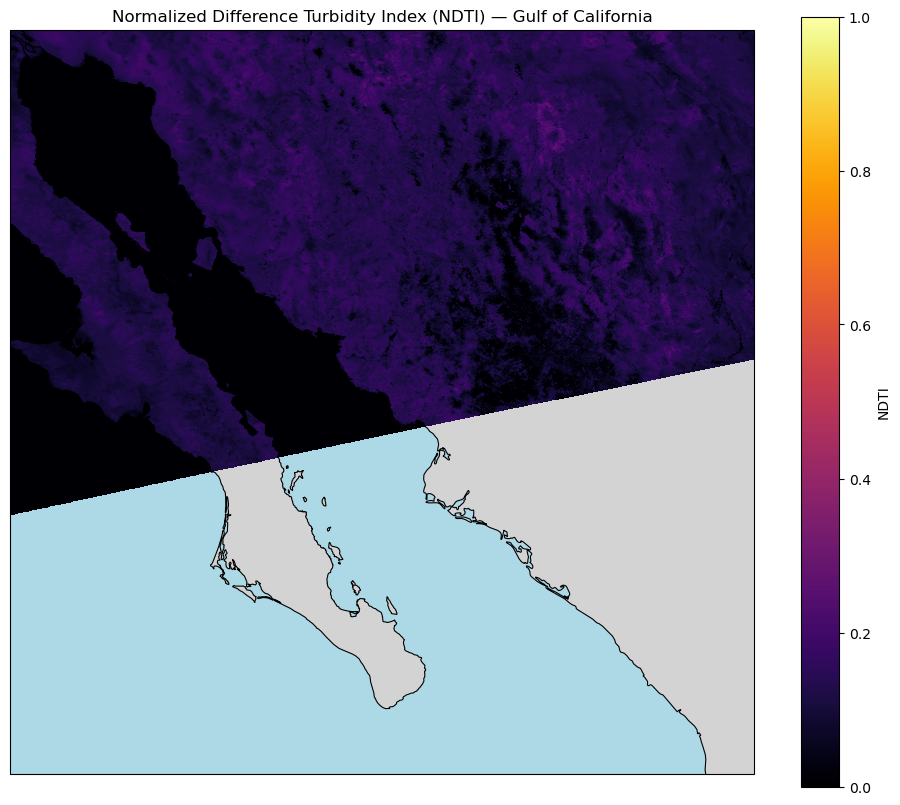

In [262]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Coordinates
lon = dataset['longitude']
lat = dataset['latitude']

if lon.ndim == 1 and lat.ndim == 1:
    Lon, Lat = np.meshgrid(lon, lat)
else:
    Lon, Lat = lon, lat

# Plot
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-115, -105, 22, 32], crs=ccrs.PlateCarree())  # Gulf of California

ax.coastlines(resolution='10m', linewidth=0.8)
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=0)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=0)

# NDTI colormap
im = ax.pcolormesh(Lon, Lat, ndti, cmap='inferno', vmin=0, vmax=1, shading='auto')
plt.colorbar(im, ax=ax, label="NDTI")

plt.title("Normalized Difference Turbidity Index (NDTI) — Gulf of California")
plt.show()


In [263]:
# Select the NIR and red bands
red_band = dataset["rhos"].sel(wavelength_3d=665, method='nearest')   # Red
nir_band = dataset["rhos"].sel(wavelength_3d=708, method='nearest')   # NIR

# Compute NDCI
ndci = (nir_band - red_band) / (nir_band + red_band)

# Mask invalid values
ndci = ndci.where(np.isfinite(ndci))


/var/folders/8n/fphqc7b17h36lwl02w5h90q80000gp/T/ipykernel_5696/73563502.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis')  # more contrasty


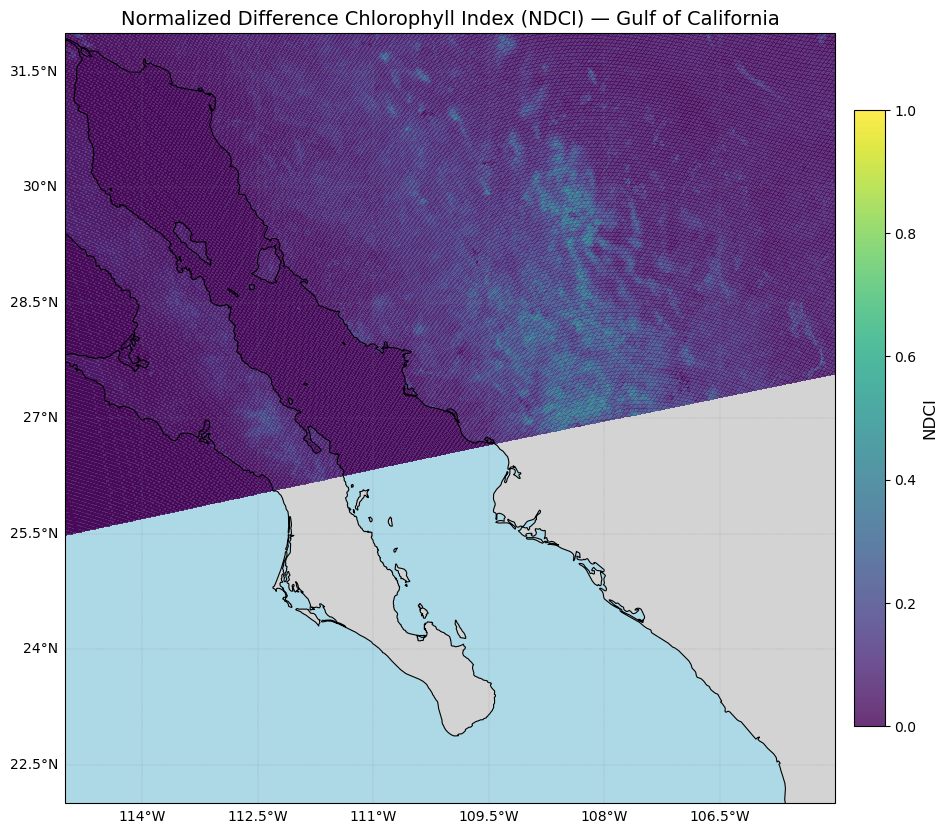

In [265]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-115, -105, 22, 32], crs=ccrs.PlateCarree())  # Gulf of California

# Base map
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=0)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=0)
ax.coastlines(resolution='10m', linewidth=0.8)

# Better NDCI colormap
cmap = plt.cm.get_cmap('viridis')  # more contrasty
im = ax.pcolormesh(Lon, Lat, ndci, cmap=cmap, vmin=0, vmax=1, shading='auto', alpha=0.8)

# Add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='vertical', shrink=0.8, pad=0.02)
cbar.set_label("NDCI", fontsize=12)

# Optional: gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

plt.title("Normalized Difference Chlorophyll Index (NDCI) — Gulf of California", fontsize=14)
plt.show()
